In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

from topchef_client import Client, NetworkError
from time import sleep
import numpy as np

In [2]:
server_url = 'http://129.97.136.203:5001'
service_id = '82959844-2cff-4eb8-afa2-76e66bf1b585'

client = Client(server_url)
service = client.services[service_id]

def wait_until_job_done(job):
    def is_complete():
        try:
            return job.is_complete
        except NetworkError:
            print 'Network error.'
            return False
    while not is_complete():
        sleep(0.5)

In [3]:
def rabi_experiment_params(duration, power_db=0, offset_freq=0, modulation_freq=0, n_shots=50000):
    return {
        'number_of_repetitions': n_shots,
        'meas_time': 800e-9,
        'center_freq': 2.87e9,
        'intermediate_freq': 0,
        'pulse1_time': duration,
        'pulse1_phase': 0,
        'pulse1_power': power_db,
        'pulse1_offset_freq': offset_freq,
        'pulse1_modulation_freq': modulation_freq,
        'pulse1_modulation_phase': 0
    }

<IPython.core.display.Javascript object>


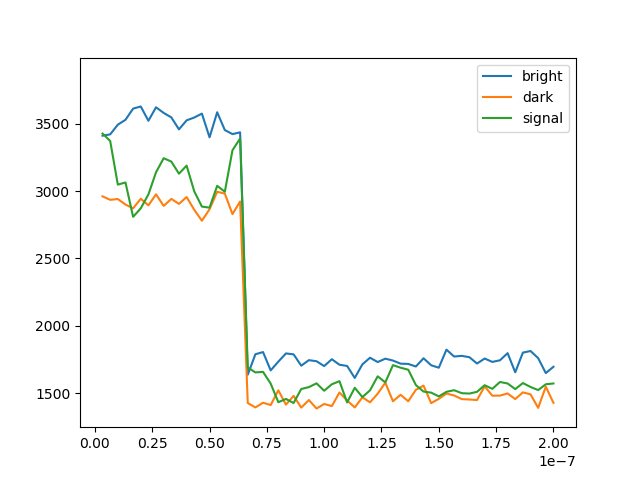

In [ ]:
n_avgs = 20
pulse_times = np.linspace(0, 200e-9, 61)[1:]
data = np.zeros((n_avgs,pulse_times.size, 3))

fig = plt.figure()
plt.plot(pulse_times, np.sum(data[:,:,0],axis=0), label='bright')
plt.plot(pulse_times, np.sum(data[:,:,1],axis=0), label='dark')
plt.plot(pulse_times, np.sum(data[:,:,2],axis=0), label='signal')
plt.legend()
def do_plot():
    ax = plt.gca()
    for idx_line, line in enumerate(ax.lines):
        y = np.random.random(size=(100,1))
        line.set_ydata(np.sum(data[:,:,idx_line], axis=0))
        plt.ylim([0.9 * np.min(np.sum(data, axis=0)), 1.1 * np.max(np.sum(data, axis=0))])
    fig.canvas.draw()
        

for idx_avg in range(n_avgs):
    for idx_pulse_time, pulse_time in enumerate(pulse_times):
        eps = rabi_experiment_params(pulse_time, n_shots=100000)
        job = service.new_job(eps)
        wait_until_job_done(job)
        result = job.result
        data[idx_avg, idx_pulse_time, :] = result['light_count'], result['dark_count'], result['result_count']
        do_plot()
        


In [124]:
data = np.concatenate([data,data2],axis=0)

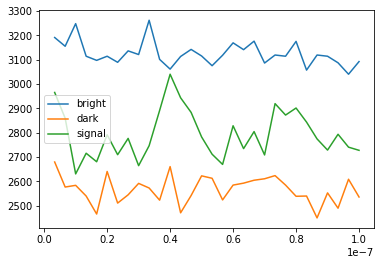

In [125]:
plt.plot(pulse_times, np.sum(data[:,:,0],axis=0), label='bright')
plt.plot(pulse_times, np.sum(data[:,:,1],axis=0), label='dark')
plt.plot(pulse_times, np.sum(data[:,:,2],axis=0), label='signal')
plt.legend()

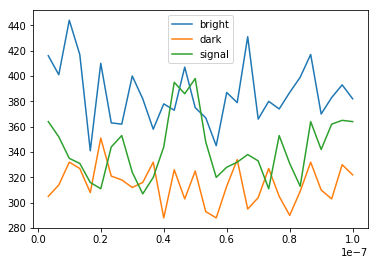

In [9]:
job = service.new_job(rabi_experiment_params(pulse_time, n_shots=200000))
wait_until_job_done(job)
print job.result

{u'dark_count': 3037, u'light_count': 3373, u'time_completed': u'2017-12-13T17:14:02-05:00', u'result_count': 3295}
